In [7]:
from PIL import Image
import numpy as np
import torch


# 이미지를 로컬에서 로드하는 함수 정의
def load_image(image_path):
    image = Image.open(image_path)
    # image = image.resize((224, 224))  # CIFAR-10 크기로 조정
    image = np.array(image).transpose(2, 0, 1)  # 채널 순서 변경
    image = torch.tensor(image, dtype=torch.float32) / 255.0  # 정규화
    image = image.unsqueeze(0)  # 배치 차원 추가
    return image

In [8]:
IMAGE_PATH = "../../data/img/hanni.jpg"

## 가로, 세로 탐지 필터 정의

In [9]:
# 필터 정의
# N 차원을 나타내기 위해 []로 한 번 더 묶음
vertical_filter = torch.tensor(
    [
        [
            [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
            [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
            [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
        ]
    ],
    dtype=torch.float32,
)

horizontal_filter = torch.tensor(
    [
        [
            [[-1, -1, -1], [0, 0, 0], [1, 1, 1]],
            [[-1, -1, -1], [0, 0, 0], [1, 1, 1]],
            [[-1, -1, -1], [0, 0, 0], [1, 1, 1]],
        ]
    ],
    dtype=torch.float32,
)

In [10]:
# Conv2d 연산을 함수처럼 사용
import torch.nn.functional as F

image = load_image(IMAGE_PATH)
image.shape

torch.Size([1, 3, 959, 640])

In [11]:
# F.conv2d 호출 시 layer 정의 없이 바로 convolution 연산 수행
vertical_output = F.conv2d(image, vertical_filter)
horizontal_output = F.conv2d(image, horizontal_filter)

(-0.5, 637.5, 956.5, -0.5)

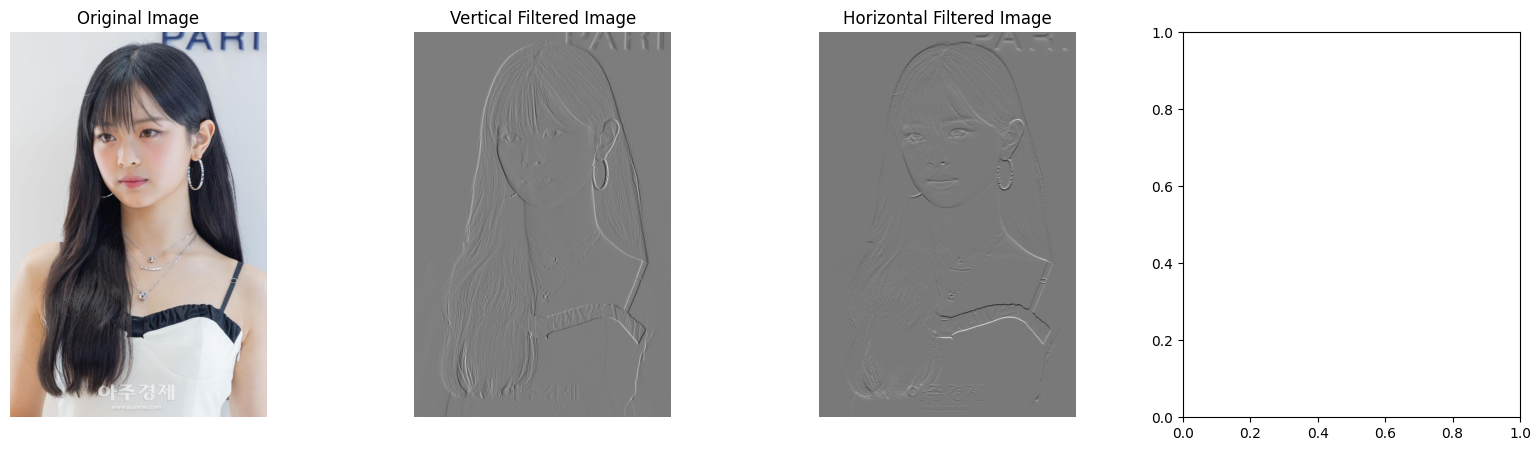

In [12]:
import matplotlib.pyplot as plt

# 결과 시각화
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# 원본 이미지 시각화
ax[0].imshow(image[0].permute(1, 2, 0))
ax[0].set_title("Original Image")
ax[0].axis("off")

# Vertical Filtered Image 시각화
ax[1].imshow(vertical_output[0].detach().numpy().transpose(1, 2, 0), cmap="gray")
ax[1].set_title("Vertical Filtered Image")
ax[1].axis("off")

# Horizontal Filtered Image 시각화
ax[2].imshow(horizontal_output[0].detach().numpy().transpose(1, 2, 0), cmap="gray")
ax[2].set_title("Horizontal Filtered Image")
ax[2].axis("off")